# Univariate Linear Regression Demo

In [1]:
# To make debugging of the custom modules easier we enable imported modules autoreloading.
%load_ext autoreload
%autoreload 2

In [2]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom linear regression implementation.
from linear_regression import LinearRegression

In [3]:
# Load the data.
data = pd.read_csv('../../data/world-happiness-report-2017.csv')

# Print first 10 records to see how the data looks like.
data.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


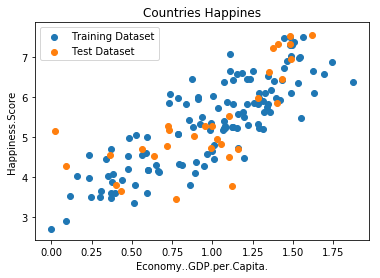

In [4]:
# Split data set on training and test sets with proportions 80/20.
# Function sample() returns a random sample of items.
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# Split training set input and output.
x_train = train_data[['Economy..GDP.per.Capita.']].values
y_train = train_data[['Happiness.Score']].values

# Split test set input and output.
x_test = test_data[['Economy..GDP.per.Capita.']].values
y_test = test_data[['Happiness.Score']].values

# Plot training data.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness.Score')
plt.title('Countries Happines')
plt.legend()
plt.show()

In [5]:
# Init linear regression.
polynomial_degree = 0  # Degree of additional polynomial features.
linear_regression = LinearRegression(x_train, y_train, polynomial_degree)

# Set up linear regression parameters.
num_iterations = 500  # Number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
learning_rate = 0.01  # The size of the gradient descent step.

# Train linear regression.
(theta, cost_history) = linear_regression.train(
    learning_rate,
    regularization_param,
    num_iterations
)

In [6]:
print('Initial cost: {:.2f}'.format(cost_history[0]))
print('Optimized cost: {:.2f}'.format(cost_history[-1]))

# Print model parameters
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
theta_table.head()

Initial cost: 224261.81
Optimized cost: 3155.63


,Model Parameters
0,5.313999
1,1.098226


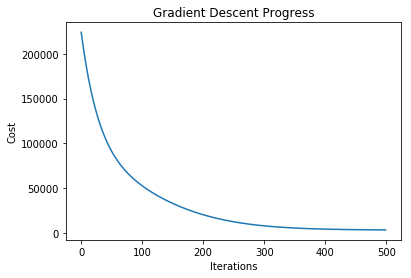

In [7]:
# Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

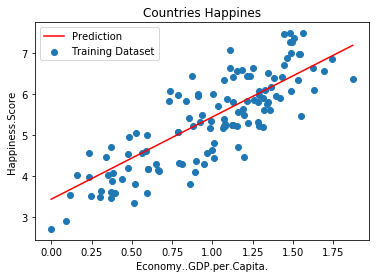

In [8]:
# Get model predictions for the trainint set.
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(predictions_num, 1);
y_predictions = linear_regression.predict(x_predictions)

# Plot training data with predictions.
plt.scatter(x_train, y_train, label='Training Dataset')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness.Score')
plt.title('Countries Happines')
plt.legend()
plt.show()

In [9]:
train_cost = linear_regression.get_cost(x_train, y_train, regularization_param)
test_cost = linear_regression.get_cost(x_test, y_test, regularization_param)

print('Train cost: {:.2f}'.format(train_cost))
print('Test cost: {:.2f}'.format(test_cost))

Train cost: 3155.63
Test cost: 331.67


In [10]:
test_predictions = linear_regression.predict(x_test)

test_predictions_table = pd.DataFrame({
    'Test Happiness Score': y_test.flatten(),
    'Predicted Happiness Score': test_predictions.flatten(),
    'Delta': (y_test - test_predictions).flatten()
})

test_predictions_table.head()

,Test Happiness Score,Predicted Happiness Score,Delta
0,7.537,6.998132,0.538869
1,7.522,6.647122,0.874878
2,7.316,6.638801,0.677199
3,7.314,6.446389,0.867611
4,7.213,6.367004,0.845995
